In [1]:
from qiskit import QuantumRegister
!pip freeze | grep -E '^qiskit==.*'

qiskit==2.0.0


$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$
$$
|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$
$$
|\psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
$$
$$
|\psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import qiskit.visualization as qvis

In [3]:
def execute_circut(qc: QuantumCircuit):
    backend =AerSimulator()
    job = backend.run(qc, shots=1024)
    result = job.result()
    return result


### Bell States

In [4]:
state1 = QuantumCircuit(2)
state1.barrier()
state1.h(0)
state1.cx(0,1)
state1.measure_all()
state1.draw()

░ ┌───┐      ░ ┌─┐   
   q_0: ─░─┤ H ├──■───░─┤M├───
         ░ └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─░──────┤ X ├─░──╫─┤M├
         ░      └───┘ ░  ║ └╥┘
meas: 2/═════════════════╩══╩═
                         0  1

In [5]:
res = execute_circut(state1)
counts = res.get_counts()
print(counts)

{'00': 506, '11': 518}


$|\phi^+\rangle = |10\rangle$

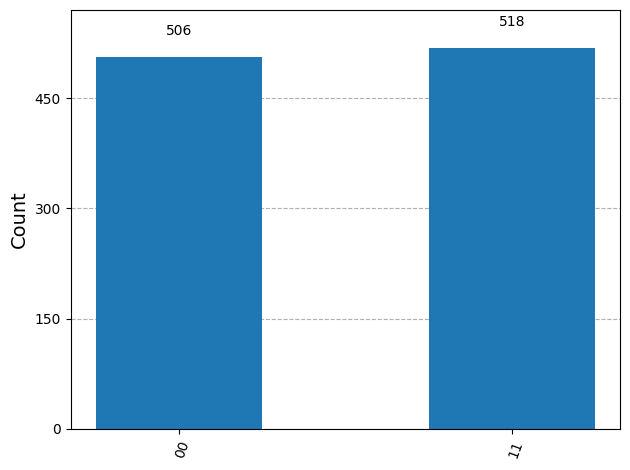

In [6]:
qvis.plot_histogram(counts)

$|\psi^+\rangle = |10\rangle$

In [7]:
state2 = QuantumCircuit(2)
state2.x(1)
state2.barrier()
state2.h(0)
state2.cx(0,1)
state2.measure_all()
state2.draw()

░ ┌───┐      ░ ┌─┐   
   q_0: ──────░─┤ H ├──■───░─┤M├───
        ┌───┐ ░ └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──────┤ X ├─░──╫─┤M├
        └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/══════════════════════╩══╩═
                              0  1

In [8]:
res = execute_circut(state2)
counts = res.get_counts()
print(counts)

{'01': 520, '10': 504}


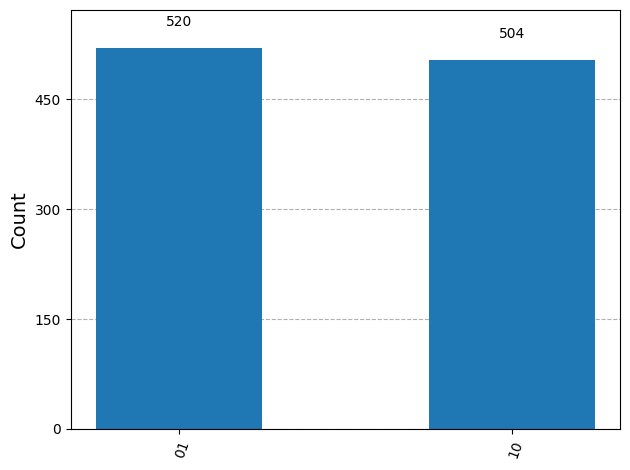

In [9]:
qvis.plot_histogram(counts)

> as a result you can determine the other qubit if result of one qubit is known
> this correlation between 2 qubits is the basis for 2 famous quantum applications - quantum teleportation and super dense codingwhere in each there are 2 qubits that are prepated in an entagled state

this preparation of the 2 qubits is represented by the bell state.

## Deutsch's Algorithm

> Deutsch's algorithm is a quantum algorithm that solves the problem of determining whether a given function is constant or balanced using only one query to the function. It demonstrates the power of quantum computing in solving certain problems more efficiently than classical algorithms.

problem: someone is hiding a coin in each hand for you to determine which possible result out of 4 such.

H, H | T, T => constant outcome
H, T | T, H => balanced outcome

and now with 100 hands in front when in worstcase continue until the 51st hand is revealed 51 becuase if the first 50 hands are heads then 51st would indicate whether it is constant(H) or balanced (T) this equates to $2^(n-1)+1$ tries in the worst case.

to solve this problem is the same as opening all the hands at once and determining whether it is constant or balanced


Events | $f(0)$ | $f(1)$
|---|---|---|
| 1 | 0 | 0 |
| 2 | 0 | 1 |
| 3 | 1 | 0 |
| 4 | 1 | 1 |

> so we introduce a black box sometimes referred to as an oracle, that is hidden from us

---
## 🎯 Goal: Detect if the function is **balanced or constant**

Let’s take:

```
f(0) = 0
f(1) = 1  → This is a BALANCED function.
```

---

## 🔢 Step 0: Initial state

We start with:

```
|ψ₀⟩ = |0⟩ ⊗ |1⟩
```

Apply X gate to q₁ (already done in the circuit), so q₁ becomes `|1⟩`.

---

## 🔀 Step 1: Apply Hadamard to both qubits

We get:

```
|q₀⟩ = H|0⟩ = (|0⟩ + |1⟩)/√2 = |+⟩
|q₁⟩ = H|1⟩ = (|0⟩ − |1⟩)/√2 = |−⟩
```

The full state:

```
|ψ₁⟩ = (1/√2)(|0⟩ + |1⟩) ⊗ (1/√2)(|0⟩ − |1⟩)
     = (1/2)(|00⟩ − |01⟩ + |10⟩ − |11⟩)
```

---

## 🧠 Step 2: Apply the oracle `Uf` for `f(0)=0`, `f(1)=1`

Remember:

```
Uf |x⟩|y⟩ = |x⟩|y ⊕ f(x)⟩  f(x)[control] y is the target
```

Apply to each term:

1. `|00⟩ → |0⟩|0⊕f(0)⟩ = |0⟩|0⊕0⟩ = |0⟩|0⟩`
2. `|01⟩ → |0⟩|1⊕f(0)⟩ = |0⟩|1⊕0⟩ = |0⟩|1⟩`
3. `|10⟩ → |1⟩|0⊕f(1)⟩ = |1⟩|0⊕1⟩ = |1⟩|1⟩`
4. `|11⟩ → |1⟩|1⊕f(1)⟩ = |1⟩|1⊕1⟩ = |1⟩|0⟩`

So we go from:

```
(1/2)(|00⟩ − |01⟩ + |10⟩ − |11⟩)
→ (1/2)(|00⟩ − |01⟩ + |11⟩ − |10⟩)
```

Rearranging:

```
= (1/2)(|00⟩ − |01⟩ − |10⟩ + |11⟩)
```

Now factor again:
```
|ψ₁⟩ = 1/2 × (|0⟩|0⟩ − |0⟩|1⟩ + |1⟩|1⟩ − |1⟩|0⟩)
```
Group again:
```
= 1/2 × [|0⟩(|0⟩ − |1⟩) + |1⟩(|1⟩ − |0⟩)]
= 1/2 × [|0⟩(|−⟩) + |1⟩(−|−⟩)]
= 1/2 × [|0⟩|−⟩ − |1⟩|−⟩]
= 1/2 × (|0⟩ − |1⟩) ⊗ |−⟩
```
### 👀 BOOM: the minus sign is on |1⟩!

The oracle has “flipped the sign” (the phase) of the |1⟩ amplitude in the q₀ qubit.
🔍 So how did the phase flip happen?

Let’s isolate the key:

You started with:
```
(|0⟩ + |1⟩) ⊗ (|0⟩ − |1⟩)
```
Then applied a CNOT-like gate where the control is x (q₀), and the target is q₁ (scratch qubit).

When f(1) = 1, this gate flips q₁ if q₀ = 1, which ends up inverting the sign of the whole amplitude for |1⟩ — because it sends |−⟩ → −|−⟩ when X is applied to it.

This is called phase kickback.

The act of flipping q₁ puts a minus sign in the amplitude of q₀=1.

So in short, after the oracle:

```
|ψ₂⟩ = (1/√2)(|0⟩ − |1⟩) ⊗ |−⟩
```

> The phase difference between `|0⟩` and `|1⟩` in `q₀` is now:
> `(−1)^{f(0)}|0⟩ + (−1)^{f(1)}|1⟩ = |0⟩ − |1⟩`

---

## 🎯 Step 3: Final Hadamard on `q₀`

Apply Hadamard to `q₀ = (|0⟩ − |1⟩)/√2`:

```
H(|0⟩ − |1⟩)/√2
= (1/√2)[(H|0⟩ − H|1⟩)]
= (1/√2)[((|0⟩ + |1⟩)/√2 − (|0⟩ − |1⟩)/√2)]
= (1/√2)[(1/√2)(|0⟩ + |1⟩ − |0⟩ + |1⟩)]
= (1/√2)[(2|1⟩)/√2]
= |1⟩
```

Boom! So now:

* `q₀ = |1⟩`
* Measurement will give **1 with 100% probability**

That means the function is **balanced** ✅

---

## 🔄 Summary Table

| f(0) | f(1) | f type   | Final q₀ state | Measure |   |
| ---- | ---- | -------- | -------------- | ------- | - |
| 0    | 0    | Constant | \`             | 0⟩\`    | 0 |
| 1    | 1    | Constant | \`             | 0⟩\`    | 0 |
| 0    | 1    | Balanced | \`             | 1⟩\`    | 1 |
| 1    | 0    | Balanced | \`             | 1⟩\`    | 1 |

---

Want to try the constant function (`f(0)=1`, `f(1)=1`) example next for contrast?


$U_f: |x\rangle|y\rangle \mapsto |x\rangle,   |y \oplus f(x)\rangle$

Inp and Output

In [10]:
qc = QuantumCircuit(2, 1)

qc.id(0)
qc.x(1)
# q_0 = |0>, q_1 = |1> which creates the fist state at the barrier (\omg_0) = |01>
qc.barrier()
qc.draw()

┌───┐ ░ 
q_0: ┤ I ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [11]:
qc.h(range(2))
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░ 
q_0: ┤ I ├─░─┤ H ├─░─
     ├───┤ ░ ├───┤ ░ 
q_1: ┤ X ├─░─┤ H ├─░─
     └───┘ ░ └───┘ ░ 
c: 1/════════════════

In [12]:
qc.cx(0,1) # entangles
qc.barrier()
qc.h(range(2))
qc.measure([0],[0])
qc.draw()

┌───┐ ░ ┌───┐ ░       ░ ┌───┐┌─┐
q_0: ┤ I ├─░─┤ H ├─░───■───░─┤ H ├┤M├
     ├───┤ ░ ├───┤ ░ ┌─┴─┐ ░ ├───┤└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░─┤ H ├─╫─
     └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/══════════════════════════════╩═
                                   0

{'1': 1024}


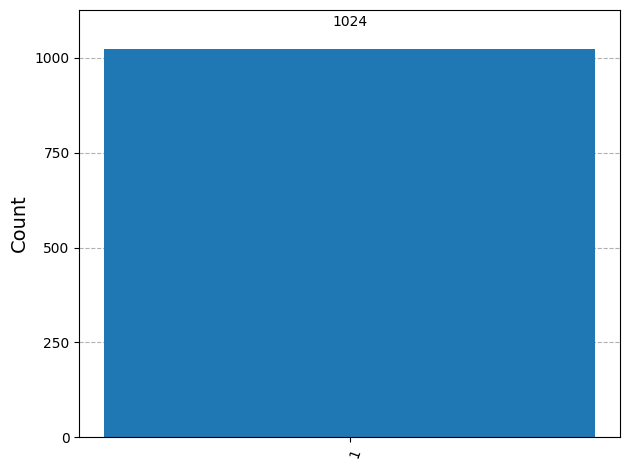

In [13]:
counts = execute_circut(qc).get_counts()
print(counts)
qvis.plot_histogram(counts)

In [14]:
# Running on real device will just introduce some errors

In [15]:
from ibmq import IBMQClient

ibm_client = IBMQClient()

In [16]:
res = ibm_client.execute(qc, 1024)

Least busy backend: ibm_sherbrooke
Job ID is d0g8kpecrrag008brar0


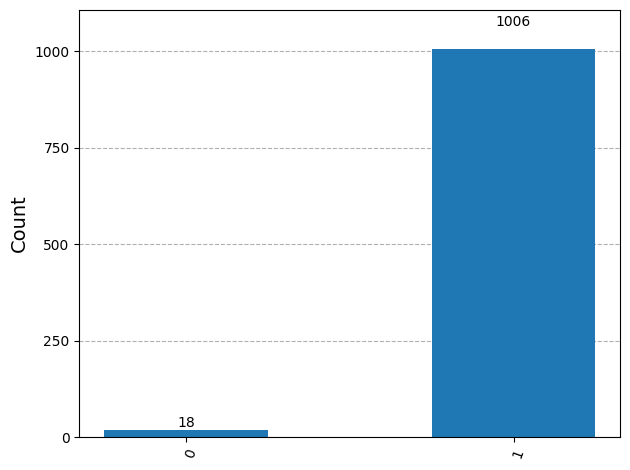

In [26]:
qvis.plot_histogram(res[0].data['c'].get_counts())